In [1]:
import numpy as np
import pulp

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wFrom, wTo = 110.0, 150.0
nStep = 10
stepSize = (wTo - wFrom)/nStep

print(stepSize)

record = np.zeros((8,nStep+1)) #record results

for i in range(0, nStep+1):
    w3 = wFrom + stepSize*i
    print(i,w3)
    prob = pulp.LpProblem("Mixture", pulp.LpMinimize)
    x1 = pulp.LpVariable("x1", 0, None)
    x2 = pulp.LpVariable("x2", 0, None)
    x3 = pulp.LpVariable("x3", 0, None)
    x4 = pulp.LpVariable("x4", 0, None)
    x5 = pulp.LpVariable("x5", 0, None)
    x6 = pulp.LpVariable("x6", 0, None)

    prob += x1 + x4 == 18
    prob += x2 + x5 == 14
    prob += x3 + x6 == 10
    prob += x1 + x2 + x3 <= 20
    prob += x4 + x5 + x6 <= 22
    prob += 140*x1 + 98*x2 + w3*x3 + 135*x4 + 95*x5 + 125*x6
    
    sol = prob.solve()
    print(pulp.LpStatus[sol]) # 毎回，解けたか否かの確認
    record[0][i] = w3
    record[1][i] = x1.value()
    record[2][i] = x2.value()
    record[3][i] = x3.value()
    record[4][i] = x4.value()
    record[5][i] = x5.value()
    record[6][i] = x6.value()
    record[7][i] = prob.objective.value()

print(record)
print(prob)

4.0
0 110.0
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/183108fa9c014c1594307137fb13a0c3-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/183108fa9c014c1594307137fb13a0c3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 29 RHS
At line 35 BOUNDS
At line 36 ENDATA
Problem MODEL has 5 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-3) rows, 3 (-3) columns and 6 (-6) elements
0  Obj 5010 Primal inf 19.999999 (1) Dual inf 14.999999 (1)
1  Obj 4890
Optimal - objective value 4890
After Postsolve, objective 4890, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 4890 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds)

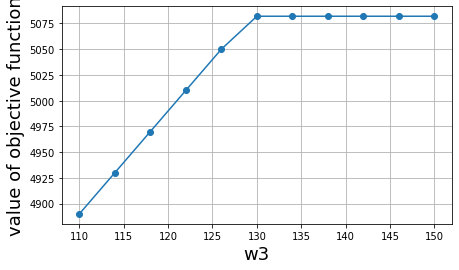

In [3]:
fig = plt.subplots(figsize=(7,4))
plt.plot(record[0], record[7], marker='o')
plt.xlabel('w3', fontsize=18)
plt.ylabel('value of objective function', fontsize=18)
plt.grid()
#plt.savefig('fig_OR_LP_Pareto.pdf')
plt.show()

### AHP

In [4]:
L = 4
matPc = np.array( [[1, 7, 1/3, 3], [1/7, 1, 1/5, 1/3], [3, 5, 1, 7], [1/3, 3, 1/7, 1]])
M = 3
matP1 = np.array( [[1, 1, 1/3], [1, 1, 1/5], [3, 5, 1]])
matP2 = np.array( [[1, 3, 7], [1/3, 1, 5], [1/7, 1/5, 1]])
matP3 = np.array( [[1, 5, 9], [1/5, 1, 5], [1/9, 1/5, 1]])
matP4 = np.array( [[1, 1/5, 3], [5, 1, 7], [1/3, 1/7, 1]])
matP = np.array([matP1, matP2, matP3, matP4]) 

In [5]:
def getWeightVecEigen(mat):
    eig_val, eig_vec = np.linalg.eig(mat)
    abs_eig_val = np.abs(eig_val)  # In case of complex number
    idx = np.argmax(abs_eig_val)   # max eigenvalue
    max_eig_val = abs_eig_val[idx]
    abs_v = np.abs(eig_vec[:,idx]) # 
    return max_eig_val, abs_v/abs_v.sum()      # Normalization so that the sum is one.

In [6]:
eigvmax_c, v_c = getWeightVecEigen(matPc)
print("max of eigen value :",eigvmax_c)
print("its eigen vector:", v_c)

max of eigen value : 4.27565830543173
its eigen vector: [0.27515837 0.0570393  0.56300898 0.10479335]


In [7]:
CI_c = (eigvmax_c - L)/(L-1)
print("CI_c=",CI_c)

CI_c= 0.09188610181057655


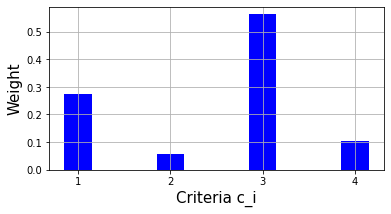

In [8]:
fig = plt.subplots(figsize=(6,3))
xtic = list(range(1,L+1))
plt.bar(x=xtic, height=v_c, width=0.3, color="b")
plt.xticks(xtic)
plt.xlabel('Criteria c_i', size=15)
plt.ylabel('Weight', size=15)
plt.grid()
#plt.savefig('fig_OR_AHP_Eigen_Weight_01.pdf', bbox_inches='tight')
plt.show()

In [9]:
v = np.zeros((L, M))
max_eigv = np.zeros(L)
for i in range(L):
    max_eigv[i], v[i] = getWeightVecEigen(matP[i])
    CI = (max_eigv[i] - M)/(M-1)
    print("CI=",CI, " max_eig_val=",max_eigv[i])

matW = v.T
matW

CI= 0.014531883399219403  max_eig_val= 3.029063766798439
CI= 0.032443789936409395  max_eig_val= 3.064887579872819
CI= 0.05854988486713064  max_eig_val= 3.1170997697342613
CI= 0.03244378993640895  max_eig_val= 3.064887579872818


array([[0.18517401, 0.649118  , 0.73519341, 0.1883941 ],
       [0.15618181, 0.27895457, 0.20669538, 0.73064467],
       [0.65864419, 0.07192743, 0.05811121, 0.08096123]])

In [10]:
matW[0]

array([0.18517401, 0.649118  , 0.73519341, 0.1883941 ])

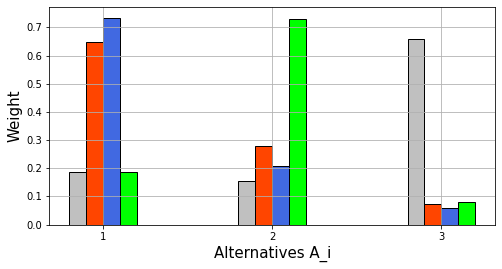

In [11]:
fig = plt.subplots(figsize=(8,4))
#x_1, x_2, x_3は棒グラフを並べてプロットするための棒グラフの位置
x_1 = [0.85, 0.95, 1.05, 1.15]
x_2 = [1.85, 1.95, 2.05, 2.15]
x_3 = [2.85, 2.95, 3.05, 3.15]

colors=["silver", "orangered", "royalblue", "lime"]
labels=["c1", "c2", "c3", "c4"]
xtic = list(range(1,M+1))

plt.bar(x=x_1, height=matW[0], width=0.1, color=colors, edgecolor="black")
plt.bar(x=x_2, height=matW[1], width=0.1, color=colors, edgecolor="black")
plt.bar(x=x_3, height=matW[2], width=0.1, color=colors, edgecolor="black")
plt.xticks(xtic)
plt.xlabel('Alternatives A_i', size=15)
plt.ylabel('Weight', size=15)
#plt.savefig('fig_OR_AHP_Eigen_Weight_02.pdf', bbox_inches='tight')
plt.grid()

In [12]:
a = np.dot(matW, v_c)
print("a=",a)

a= [0.52164036 0.25182416 0.22653548]


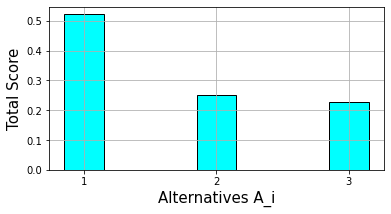

In [13]:
fig = plt.subplots(figsize=(6,3))
xtic = list(range(1,M+1))
plt.bar(x=xtic, height=a, width=0.3, color="cyan", edgecolor="black")
plt.xticks(xtic)
plt.xlabel('Alternatives A_i', size=15)
plt.ylabel('Total Score', size=15)
plt.grid()
#plt.savefig('fig_OR_AHP_Eigen_Weight_03.pdf', bbox_inches='tight')
plt.show()